In [3]:
import os
from shutil import copyfile
import pickle
import numpy as np
import xml.etree.ElementTree as etree
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = '../VOCdevkit/VOC2012/'

In [4]:
files_all = os.listdir('../VOCdevkit/VOC2012/ImageSets/Main/')

In [5]:
files_all = os.listdir('../VOCdevkit/VOC2012/ImageSets/Main/')
classes = []
for each_file in files_all:
    name  = each_file.split('_')[0]
    if name not in classes and not name.endswith('.txt'):
        classes.append(name)
classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [5]:
train_images_list = []

for each_class in classes:
    train_images_list.append(each_class + '_val.txt')
train_images_list

['aeroplane_val.txt',
 'bicycle_val.txt',
 'bird_val.txt',
 'boat_val.txt',
 'bottle_val.txt',
 'bus_val.txt',
 'car_val.txt',
 'cat_val.txt',
 'chair_val.txt',
 'cow_val.txt',
 'diningtable_val.txt',
 'dog_val.txt',
 'horse_val.txt',
 'motorbike_val.txt',
 'person_val.txt',
 'pottedplant_val.txt',
 'sheep_val.txt',
 'sofa_val.txt',
 'train_val.txt',
 'tvmonitor_val.txt']

In [6]:
true_classes = {}
print(path)
for each_file in train_images_list:
    class_name = each_file.split('_')[0]
    true_files = []
    with open(path + 'ImageSets/Main/' + each_file, 'r') as train_file:
        for line in train_file:
            f_name, label = line.strip().split()
            if label == '1':
                true_files.append(f_name)
        true_classes[class_name] = true_files

./VOCdevkit/VOC2012/


In [7]:
true_classes.keys()

dict_keys(['pottedplant', 'bicycle', 'tvmonitor', 'motorbike', 'chair', 'car', 'bird', 'boat', 'sofa', 'bottle', 'bus', 'diningtable', 'person', 'sheep', 'dog', 'cow', 'aeroplane', 'train', 'horse', 'cat'])

In [8]:
annot_path = './VOCdevkit/VOC2012/Annotations/'

In [10]:
for class_name, files in true_classes.items():
    src_path_annots = './VOCdevkit/VOC2012/Annotations/'
    src_path_images = './VOCdevkit/VOC2012/JPEGImages/'
    
    if not os.path.exists('./data_val/' + 'images'):
        os.makedirs('./data_val/' + 'images')
        os.makedirs('./data_val/' + 'annotations')
    os.makedirs(os.path.join('./data_val', 'images', class_name))
    os.makedirs(os.path.join('./data_val', 'annotations', class_name))
    dest_path_images = os.path.join('./data_val/','images', class_name + '/')
    dest_path_annots = os.path.join('./data_val/','annotations', class_name + '/')
        
    for each_file in files:
        copyfile(src_path_images + each_file + '.jpg', dest_path_images + each_file + '.jpg')
        copyfile(src_path_annots + each_file + '.xml', dest_path_annots + each_file + '.xml')

In [49]:
def get_class_distrib(top_level_direc, plot=False):
    classes = {}
    dirs = os.listdir(top_level_direc)
    for each_dir in dirs:
        full_path = os.path.join(top_level_direc, each_dir)
        class_count = len(os.listdir(full_path))
        classes[each_dir] = class_count
    if plot:
        plt.figure(figsize=(20, 8))
        x, y = list(classes.keys()), list(classes.values())
        x_dummy = range(len(x))
        rects = plt.bar(x_dummy, y, align='center')
        autolabel(rects)
        plt.xticks(x_dummy, x)
        plt.show()
    return classes

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,'%d' % int(height),ha='center', va='bottom')

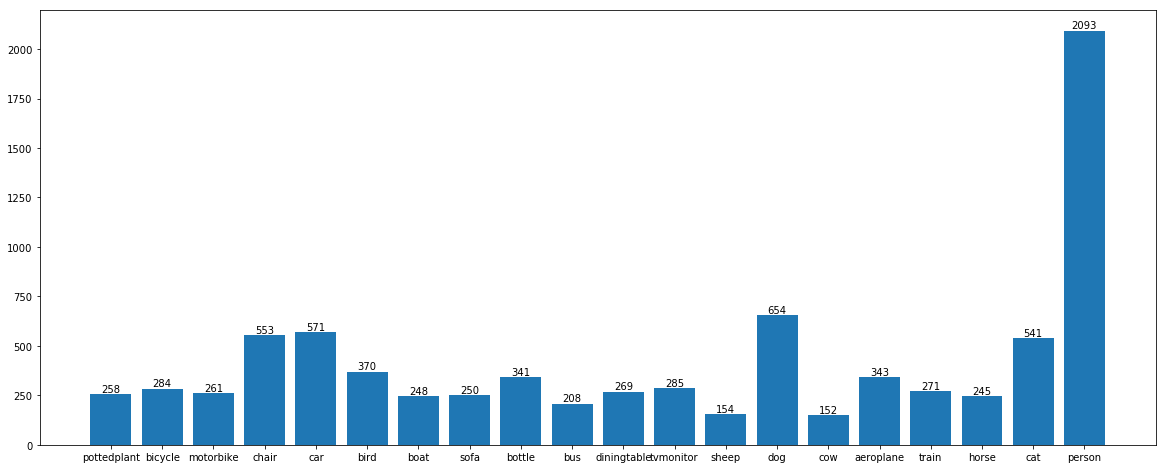

{'aeroplane': 343,
 'bicycle': 284,
 'bird': 370,
 'boat': 248,
 'bottle': 341,
 'bus': 208,
 'car': 571,
 'cat': 541,
 'chair': 553,
 'cow': 152,
 'diningtable': 269,
 'dog': 654,
 'horse': 245,
 'motorbike': 261,
 'person': 2093,
 'pottedplant': 258,
 'sheep': 154,
 'sofa': 250,
 'train': 271,
 'tvmonitor': 285}

In [13]:
get_class_distrib('./data_val/images/', plot=True)

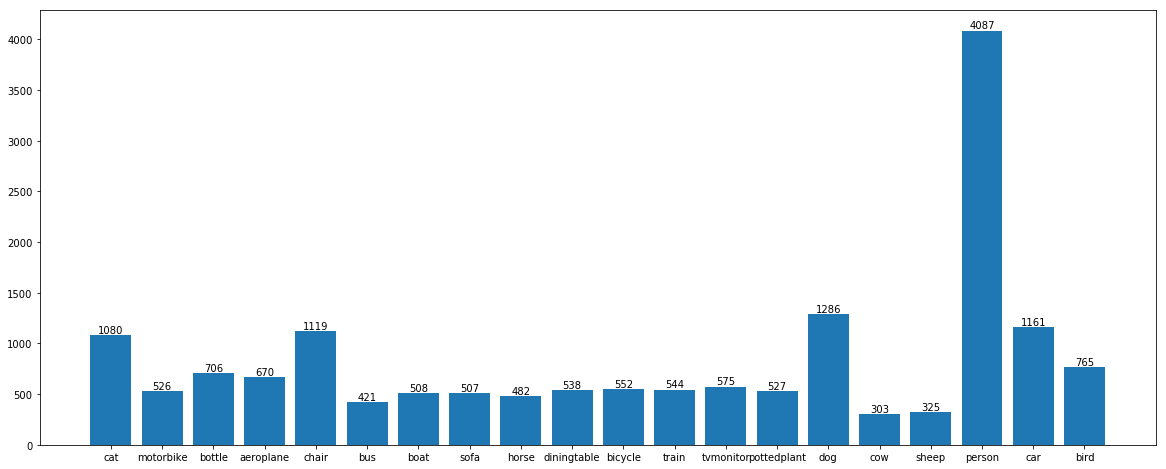

In [26]:
dict_classes = get_class_distrib('./dataset/images/', plot=True)

In [29]:
keys = dict_classes.values()

In [31]:
total = 0

for each_val in keys:
    total += each_val
total

16682

In [10]:
import xml.etree.ElementTree as etree

In [30]:
# checking whether there is only one label in a give image
# 1. Parse xml file for objects
# 2. count number of same object instances
# 3. select only those files with one object instances

true_data_path = './dataset/annotations/'
classes = os.listdir(true_data_path)
na_files = {}
for each_class in classes:
    path = true_data_path + each_class
    files = os.listdir(path)
    files_list = []
    for each_file in files:
        count = 0
        xml_file = etree.parse(os.path.join(path, each_file))
        root = xml_file.getroot()
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls != each_class:
                continue
            count += 1
        if count > 1:
            files_list.append(each_file)
    na_files[each_class] = files_list

In [31]:
img_path = './dataset/images/'
annot_path = './dataset/annotations/'
for each_class, files in na_files.items():
    cmp_img_path = os.path.join(img_path, each_class)
    cmp_annot_path = os.path.join(annot_path, each_class)
    for each_file in files:
        fname = each_file.split('.')[0]
        os.remove(os.path.join(cmp_img_path, fname + '.jpg'))
        os.remove(os.path.join(cmp_annot_path, fname + '.xml'))

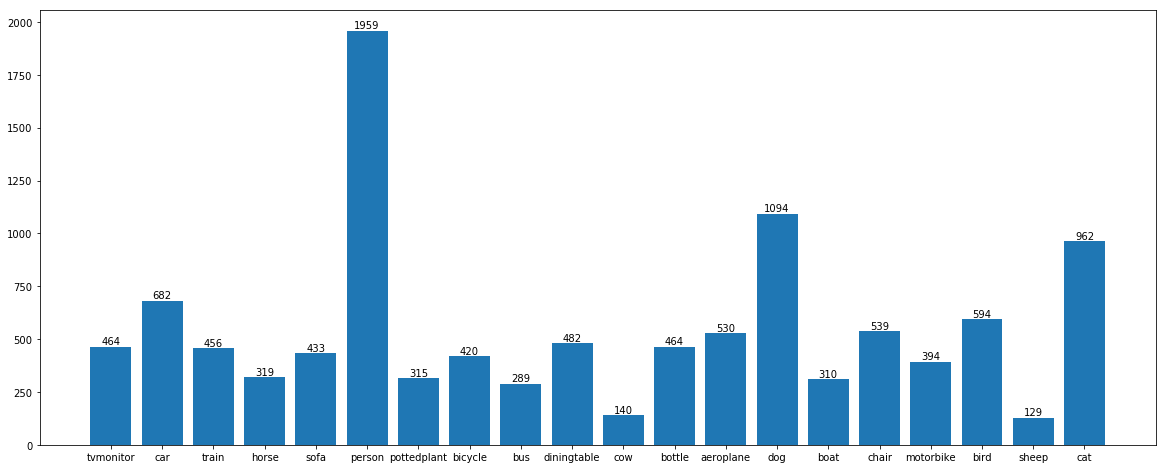

{'aeroplane': 530,
 'bicycle': 420,
 'bird': 594,
 'boat': 310,
 'bottle': 464,
 'bus': 289,
 'car': 682,
 'cat': 962,
 'chair': 539,
 'cow': 140,
 'diningtable': 482,
 'dog': 1094,
 'horse': 319,
 'motorbike': 394,
 'person': 1959,
 'pottedplant': 315,
 'sheep': 129,
 'sofa': 433,
 'train': 456,
 'tvmonitor': 464}

In [32]:
get_class_distrib('./dataset/images/', plot=True)

In [ ]:
# for validation dataset
files_all = os.listdir('./VOCdevkit/VOC2012/ImageSets/Main/')

In [25]:
# now I train the network on car, catm dog, bird, tvmonitor, chair, bottle, sofa, aeroplane, person

val_images_list = []

for each_class in classes:
    val_images_list.append(each_class + '_val.txt')
val_images_list

['horse_val.txt',
 'train_val.txt',
 'dog_val.txt',
 'tvmonitor_val.txt',
 'aeroplane_val.txt',
 'boat_val.txt',
 'sheep_val.txt',
 'pottedplant_val.txt',
 'diningtable_val.txt',
 'person_val.txt',
 'bird_val.txt',
 'bus_val.txt',
 'car_val.txt',
 'chair_val.txt',
 'bicycle_val.txt',
 'sofa_val.txt',
 'bottle_val.txt',
 'cat_val.txt',
 'motorbike_val.txt',
 'cow_val.txt']

In [28]:
true_classes = {}
for each_file in val_images_list:
    class_name = each_file.split('_')[0]
    true_files = []
    with open(path + 'ImageSets/Main/' + each_file, 'r') as train_file:
        for line in train_file:
            f_name, label = line.strip().split()
            if label == '1':
                true_files.append(f_name)
        true_classes[class_name] = true_files

In [29]:
for class_name, files in true_classes.items():
    src_path_annots = './VOCdevkit/VOC2012/Annotations/'
    src_path_images = './VOCdevkit/VOC2012/JPEGImages/'
    
    if not os.path.exists('./data_val/' + 'images'):
        os.makedirs('./data_val/' + 'images')
        os.makedirs('./data_val/' + 'annotations')
    os.makedirs(os.path.join('./data_val', 'images', class_name))
    os.makedirs(os.path.join('./data_val', 'annotations', class_name))
    dest_path_images = os.path.join('./data_val/','images', class_name + '/')
    dest_path_annots = os.path.join('./data_val/','annotations', class_name + '/')
        
    for each_file in files:
        copyfile(src_path_images + each_file + '.jpg', dest_path_images + each_file + '.jpg')
        copyfile(src_path_annots + each_file + '.xml', dest_path_annots + each_file + '.xml')

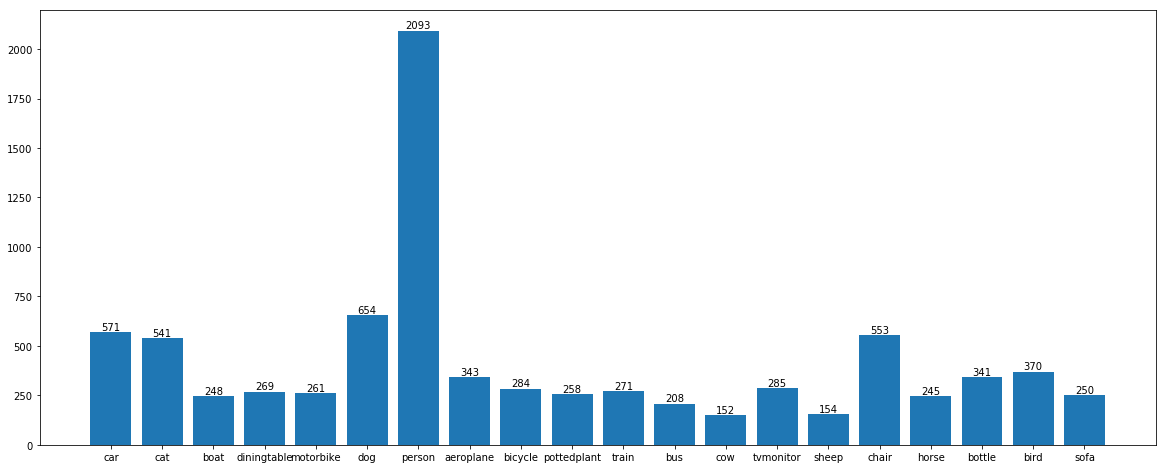

{'aeroplane': 343,
 'bicycle': 284,
 'bird': 370,
 'boat': 248,
 'bottle': 341,
 'bus': 208,
 'car': 571,
 'cat': 541,
 'chair': 553,
 'cow': 152,
 'diningtable': 269,
 'dog': 654,
 'horse': 245,
 'motorbike': 261,
 'person': 2093,
 'pottedplant': 258,
 'sheep': 154,
 'sofa': 250,
 'train': 271,
 'tvmonitor': 285}

In [30]:
get_class_distrib('./data_val/images/', plot=True)

In [31]:
true_data_path = './data_val/annotations/'
classes = os.listdir(true_data_path)
na_files = {}
for each_class in classes:
    path = true_data_path + each_class
    files = os.listdir(path)
    files_list = []
    for each_file in files:
        count = 0
        xml_file = etree.parse(os.path.join(path, each_file))
        root = xml_file.getroot()
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls != each_class:
                continue
            count += 1
        if count > 1:
            files_list.append(each_file)
    na_files[each_class] = files_list

In [32]:
img_path = './data_val/images/'
annot_path = './data_val/annotations/'
for each_class, files in na_files.items():
    cmp_img_path = os.path.join(img_path, each_class)
    cmp_annot_path = os.path.join(annot_path, each_class)
    for each_file in files:
        fname = each_file.split('.')[0]
        os.remove(os.path.join(cmp_img_path, fname + '.jpg'))
        os.remove(os.path.join(cmp_annot_path, fname + '.xml'))

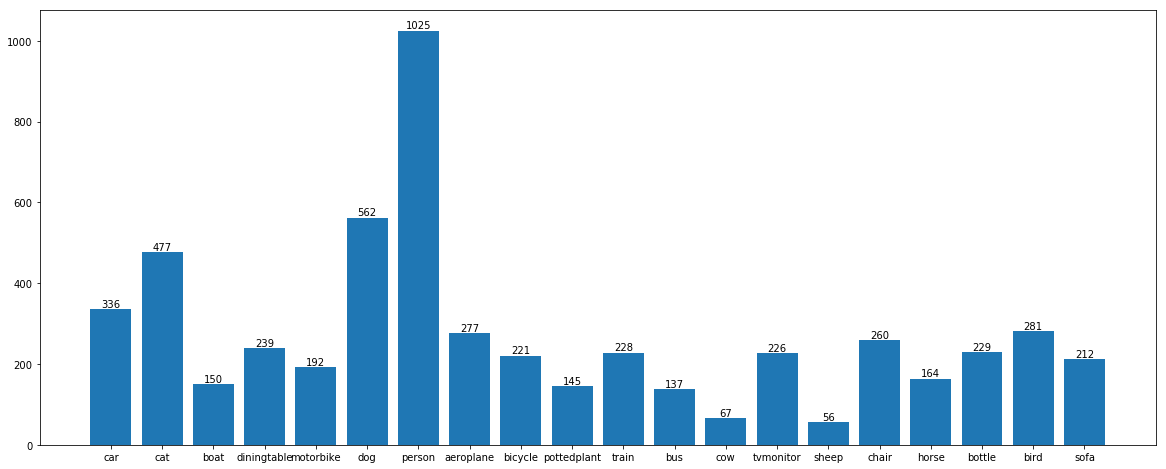

{'aeroplane': 277,
 'bicycle': 221,
 'bird': 281,
 'boat': 150,
 'bottle': 229,
 'bus': 137,
 'car': 336,
 'cat': 477,
 'chair': 260,
 'cow': 67,
 'diningtable': 239,
 'dog': 562,
 'horse': 164,
 'motorbike': 192,
 'person': 1025,
 'pottedplant': 145,
 'sheep': 56,
 'sofa': 212,
 'train': 228,
 'tvmonitor': 226}

In [33]:
get_class_distrib('./data_val/images/', plot=True)

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import os
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

In [3]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
        img = augment_brightness_camera_images(img)

    return img

In [4]:
def create_data(folder_path, num_files):
    full_path = os.path.abspath(folder_path)
    img_list = os.listdir(folder_path)
    for each_img in img_list:
        if each_img.endswith('jpg'):
            img = mpimg.imread(os.path.join(full_path, each_img))
            for _ in range(num_files):
                trans_img = transform_image(img,20,10,5,brightness=1)
                mpimg.imsave(os.path.join(full_path, each_img.split('.')[0]+'gen_'+str(_)+'.jpg'), trans_img)

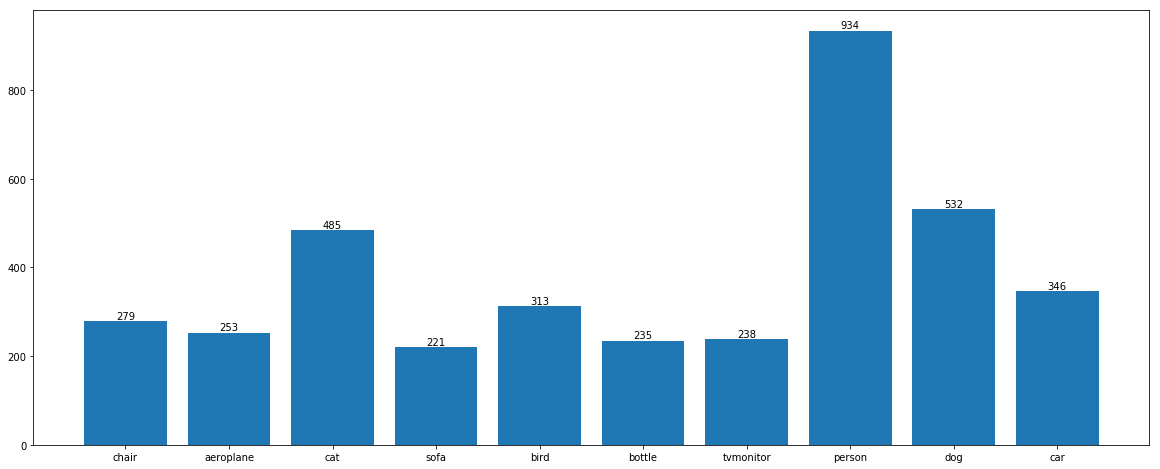

In [8]:
classes = get_class_distrib('./dataaug/images/', plot=True)

In [9]:
testing = 2000 // np.array(list(classes.values()))
testing

array([7, 7, 4, 9, 6, 8, 8, 2, 3, 5])

In [10]:
train_path = './dataaug/images/'

In [11]:
for num, each_class in enumerate(classes.keys()):
    print('started additional data generation')
    create_data(os.path.join(train_path, each_class), testing[num])
    print("Generation completed for ", each_class)

started additional data generation
Generation completed for  chair
started additional data generation
Generation completed for  aeroplane
started additional data generation
Generation completed for  cat
started additional data generation
Generation completed for  sofa
started additional data generation
Generation completed for  bird
started additional data generation
Generation completed for  bottle
started additional data generation
Generation completed for  tvmonitor
started additional data generation
Generation completed for  person
started additional data generation
Generation completed for  dog
started additional data generation
Generation completed for  car


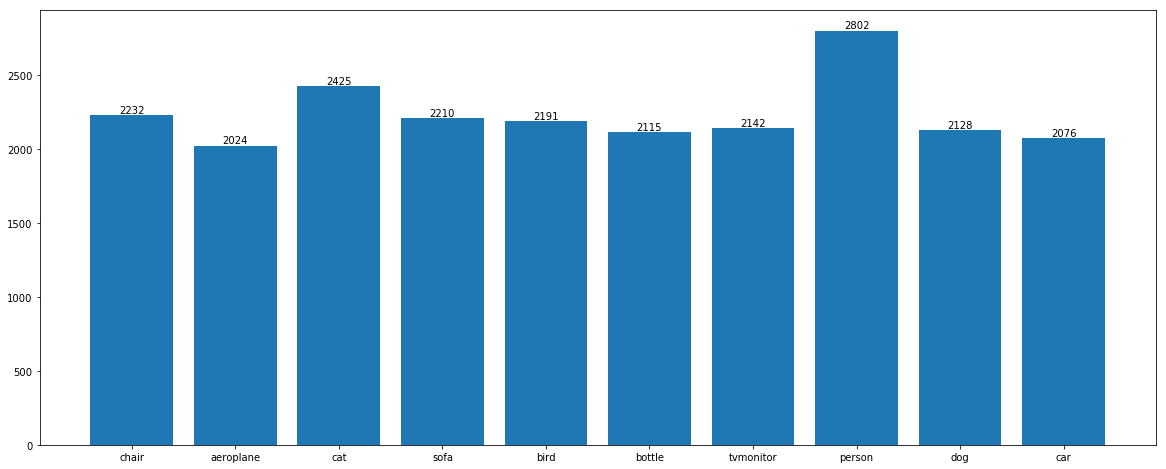

In [12]:
classes = get_class_distrib('./dataaug/images/', plot=True)

#### Filter dataset so that it contains only single objects

In [3]:
#annot_path = '../VOCdevkit/VOC2012/Annotations/'
annot_path = '../VOCdevkit/VOC2007/Annotations/'

In [4]:
len(os.listdir(annot_path))

9963

In [6]:
def count_objects(f_path):
    xml_file = etree.parse(f_path)
    root = xml_file.getroot()
    count = 0
    for obj in root.iter('object'):
        cls = obj.find('name').text
        count += 1
    return count

In [7]:
num_objects = {}

for fname in os.listdir(annot_path):
    full_path = annot_path + fname
    num_objects[fname] = count_objects(full_path)

In [8]:
import pickle

In [9]:
with open('num_objects_2007.pkl', 'wb') as to_write:
    pickle.dump(num_objects, to_write)

In [10]:
len(num_objects)

9963

In [11]:
# removing files with more than one object
fnames = []
for fname, value in num_objects.items():
    if value > 1:
        fnames.append(fname)

In [12]:
len(num_objects), len(fnames)

(9963, 6193)

In [13]:
for each_name in fnames:
    num_objects.pop(each_name)

In [14]:
len(num_objects)

3770

In [15]:
with open('real_dataset_with_single_objects_2007.pkl', 'wb') as to_write:
    pickle.dump(num_objects, to_write)

In [16]:
#files_all = os.listdir('../VOCdevkit/VOC2012/ImageSets/Main/')
files_all = os.listdir('../VOCdevkit/VOC2007/ImageSets/Main/')
classes = []
for each_file in files_all:
    name  = each_file.split('_')[0]
    if name not in classes and not name.endswith('.txt'):
        classes.append(name)
classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [17]:
classes_files = {}
for fname in num_objects.keys():
    xml_file = etree.parse(annot_path + fname)
    root = xml_file.getroot()
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes_files.keys():
            classes_files[cls] = []
        classes_files[cls].append(fname.split('.')[0])

In [18]:
classes_files

{'aeroplane': ['003554',
  '006232',
  '007086',
  '001708',
  '007155',
  '007626',
  '000610',
  '007503',
  '008950',
  '002629',
  '004196',
  '000521',
  '009030',
  '001911',
  '000730',
  '009329',
  '001270',
  '006443',
  '007677',
  '007403',
  '005575',
  '005828',
  '002942',
  '000600',
  '005655',
  '007274',
  '002255',
  '004988',
  '005008',
  '008825',
  '004572',
  '004452',
  '003183',
  '004278',
  '006523',
  '003493',
  '007096',
  '000763',
  '001660',
  '004391',
  '006162',
  '007870',
  '005376',
  '003347',
  '007973',
  '005402',
  '004674',
  '008300',
  '007916',
  '000968',
  '007502',
  '008908',
  '001994',
  '008107',
  '002851',
  '003233',
  '003144',
  '009371',
  '001870',
  '001436',
  '000418',
  '001107',
  '000067',
  '002099',
  '008971',
  '008847',
  '009432',
  '005290',
  '002089',
  '003372',
  '000256',
  '005079',
  '001547',
  '000216',
  '007711',
  '004379',
  '007262',
  '009076',
  '007033',
  '004199',
  '004390',
  '001332',
  '

In [19]:
with open('classes_fnames_single_objects_only_very_important_2007.pkl', 'wb') as to_write:
    pickle.dump(classes_files, to_write)

In [20]:
def get_class_distrib(dict_name, plot=False):
    classes = {}
    for each_class, class_files in dict_name.items():
        classes[each_class] = len(class_files)
    if plot:
        plt.figure(figsize=(20, 8))
        x, y = list(classes.keys()), list(classes.values())
        x_dummy = range(len(x))
        rects = plt.bar(x_dummy, y, align='center')
        autolabel(rects)
        plt.xticks(x_dummy, x)
        plt.show()
    return classes

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,'%d' % int(height),ha='center', va='bottom')

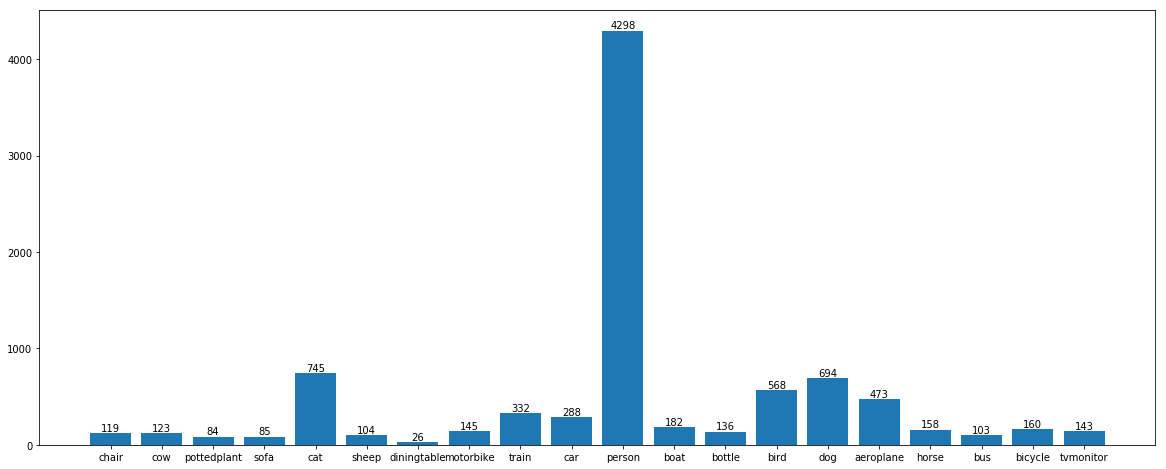

{'aeroplane': 473,
 'bicycle': 160,
 'bird': 568,
 'boat': 182,
 'bottle': 136,
 'bus': 103,
 'car': 288,
 'cat': 745,
 'chair': 119,
 'cow': 123,
 'diningtable': 26,
 'dog': 694,
 'horse': 158,
 'motorbike': 145,
 'person': 4298,
 'pottedplant': 84,
 'sheep': 104,
 'sofa': 85,
 'train': 332,
 'tvmonitor': 143}

In [52]:
# VOC 2012 after filtering
get_class_distrib(classes_files, True)

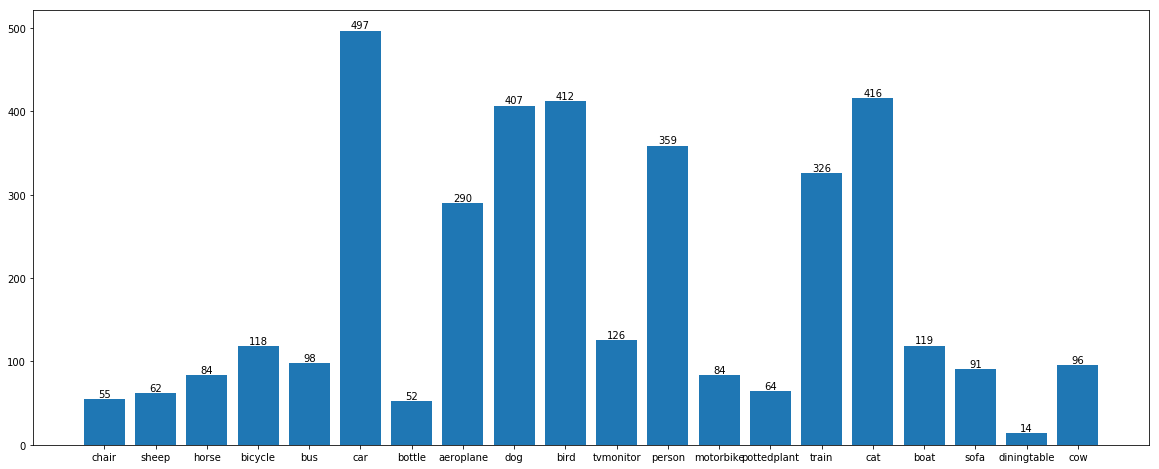

{'aeroplane': 290,
 'bicycle': 118,
 'bird': 412,
 'boat': 119,
 'bottle': 52,
 'bus': 98,
 'car': 497,
 'cat': 416,
 'chair': 55,
 'cow': 96,
 'diningtable': 14,
 'dog': 407,
 'horse': 84,
 'motorbike': 84,
 'person': 359,
 'pottedplant': 64,
 'sheep': 62,
 'sofa': 91,
 'train': 326,
 'tvmonitor': 126}

In [21]:
# VOC 2007 after filtering
get_class_distrib(classes_files, True)

In [23]:
#src_path_images = '../VOCdevkit/VOC2012/JPEGImages/'
src_path_images = '../VOCdevkit/VOC2007/JPEGImages/'

In [56]:
# copying images initially for VOC2012
hold_out = ['chair', 'cow', 'pottedplant', 'sofa', 'tvmonitor']
for each_class, all_files in classes_files.items():
    if each_class not in hold_out:
        os.makedirs('./classification_dataset/' + each_class + '/')
        dest_path = './classification_dataset/' + each_class + './'
        for fname in all_files:
             copyfile(src_path_images + fname + '.jpg', dest_path + fname + '.jpg')
        print(each_class+' completed')
    else:
        os.makedirs('./holdout_dataset/' + each_class + '/')
        dest_path = './holdout_dataset/' + each_class + './'
        for fname in all_files:
             copyfile(src_path_images + fname + '.jpg', dest_path + fname + '.jpg')
        print(each_class+' completed')        

chair completed
aeroplane completed
pottedplant completed
sofa completed
cat completed
sheep completed
diningtable completed
motorbike completed
train completed
car completed
bus completed
person completed
bird completed
tvmonitor completed
boat completed
dog completed
cow completed
horse completed
bicycle completed
bottle completed


In [24]:
# copying images for VOC2007 
hold_out = ['chair', 'cow', 'pottedplant', 'sofa', 'tvmonitor']
for each_class, all_files in classes_files.items():
    if each_class not in hold_out:
        #os.makedirs('./classification_dataset/' + each_class + '/')
        dest_path = './classification_dataset/' + each_class + './'
        for fname in all_files:
             copyfile(src_path_images + fname + '.jpg', dest_path + fname + '.jpg')
        print(each_class+' completed')
    else:
        #os.makedirs('./holdout_dataset/' + each_class + '/')
        dest_path = './holdout_dataset/' + each_class + './'
        for fname in all_files:
             copyfile(src_path_images + fname + '.jpg', dest_path + fname + '.jpg')
        print(each_class+' completed') 

chair completed
sheep completed
sofa completed
bicycle completed
motorbike completed
car completed
aeroplane completed
bottle completed
dog completed
tvmonitor completed
bird completed
cat completed
cow completed
bus completed
train completed
pottedplant completed
boat completed
horse completed
diningtable completed
person completed


In [59]:
# for holdout validation dataset
for each_class in hold_out:
    src_path = './holdout_dataset/' + each_class + '/'
    os.makedirs('./holdout_val/' + each_class + '/')
    dest_path = './holdout_val/' + each_class + '/'
    subset = os.listdir(src_path)[:10]
    for each_file in subset:
        os.rename(src_path + each_file, dest_path + each_file)

###### Deleted dining table class from classification dataset and also deleted around 3500 person images

In [60]:
# for classification validation dataset
train_classes = os.listdir('./classification_dataset/')

for each_class in train_classes:
    src_path = './classification_dataset/' + each_class + '/'
    os.makedirs('./classification_val/' + each_class + '/')
    dest_path = './classification_val/' + each_class + '/'
    subset = os.listdir(src_path)[:20]
    for each_file in subset:
        os.rename(src_path + each_file, dest_path + each_file)

In [25]:
#class distrib for directories
def get_class_distrib(top_level_direc, plot=False):
    classes = {}
    dirs = os.listdir(top_level_direc)
    for each_dir in dirs:
        full_path = os.path.join(top_level_direc, each_dir)
        class_count = len(os.listdir(full_path))
        classes[each_dir] = class_count
    if plot:
        plt.figure(figsize=(20, 8))
        x, y = list(classes.keys()), list(classes.values())
        x_dummy = range(len(x))
        rects = plt.bar(x_dummy, y, align='center')
        autolabel(rects)
        plt.xticks(x_dummy, x)
        plt.show()
    return classes

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.0*height,'%d' % int(height),ha='center', va='bottom')

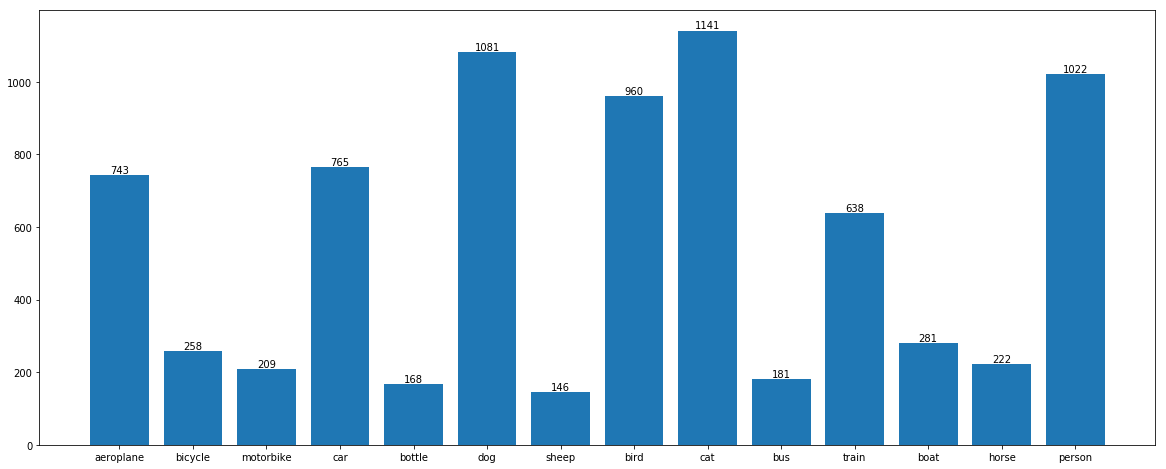

{'aeroplane': 743,
 'bicycle': 258,
 'bird': 960,
 'boat': 281,
 'bottle': 168,
 'bus': 181,
 'car': 765,
 'cat': 1141,
 'dog': 1081,
 'horse': 222,
 'motorbike': 209,
 'person': 1022,
 'sheep': 146,
 'train': 638}

In [27]:
# after merging VOC2012 and VOC2007
get_class_distrib('./classification_dataset/', True)

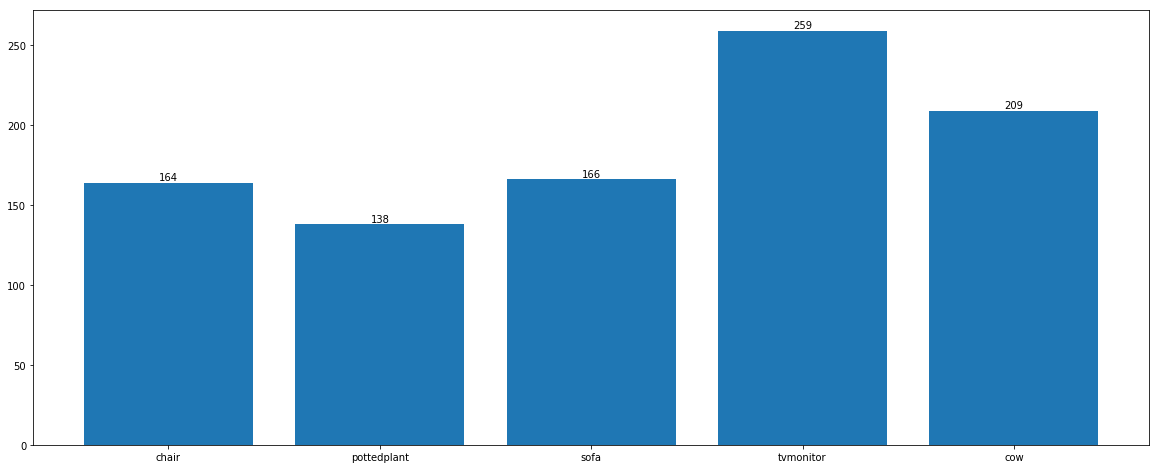

{'chair': 164, 'cow': 209, 'pottedplant': 138, 'sofa': 166, 'tvmonitor': 259}

In [28]:
# after merging VOC2012 and VOC2007
get_class_distrib('./holdout_dataset/', True)

#### preparing bbox dataset

In [2]:
classification_path = './classification_dataset/'
bbox_dataset_images = './localization_dataset/images/'
bbox_dataset_annots = './localization_dataset/annotations/'
all_annots_path = '../VOCdevkit/VOC2012/'

In [6]:
with open('./classes_fnames_single_objects_only_very_important_2007.pkl', 'rb') as single_objects:
    class_dataset = pickle.load(single_objects)

In [8]:
class_dataset.keys()

dict_keys(['aeroplane', 'car', 'boat', 'tvmonitor', 'pottedplant', 'diningtable', 'train', 'cow', 'bus', 'cat', 'motorbike', 'dog', 'bird', 'horse', 'sheep', 'bicycle', 'sofa', 'chair', 'person', 'bottle'])

In [9]:
hold_out = ['chair', 'cow', 'pottedplant', 'sofa', 'tvmonitor']

In [12]:
class_dataset.pop('diningtable')

['009706',
 '008608',
 '002799',
 '003561',
 '003668',
 '001740',
 '005628',
 '005803',
 '002188',
 '009385',
 '005871',
 '003800',
 '006980',
 '001834']

In [27]:
#src_path_images_train = '../VOCdevkit/VOC2007/JPEGImages/'
#src_path_annots_train = '../VOCdevkit/VOC2007/Annotations/'
src_path_images_train = '../VOCdevkit/VOC2012/JPEGImages/'
src_path_annots_train = '../VOCdevkit/VOC2012/Annotations/'
bboximages_train_path = './localization_dataset/train_images/'
bboxannots_train_path = './localization_dataset/train_annotations/'
bboximages_val_path = './localization_dataset/val_images/'
bboxannots_val_path = './localization_dataset/val_annotations/'
bbox_holdout_images = './localization_dataset/holdout_images/'
bbox_holdout_annots = './localization_dataset/holdout_annotations/'


for each_class, class_files in class_dataset.items():
    
    if each_class not in hold_out:
        for each_file in class_files[:len(class_files) - 10]:
            copyfile(src_path_images_train + each_file + '.jpg', bboximages_train_path + each_file + '.jpg')
            copyfile(src_path_annots_train + each_file + '.xml', bboxannots_train_path + each_file + '.xml')
        for each_file in class_files[-10:]:
            copyfile(src_path_images_train + each_file + '.jpg', bboximages_val_path + each_file + '.jpg')
            copyfile(src_path_annots_train + each_file + '.xml', bboxannots_val_path + each_file + '.xml')
        
    else:
        for each_file in class_files:
            copyfile(src_path_images_train + each_file + '.jpg', bbox_holdout_images + each_file + '.jpg')
            copyfile(src_path_annots_train + each_file + '.xml', bbox_holdout_annots + each_file + '.xml')
            
    print("processing complete : ", each_class)

processing complete :  aeroplane
processing complete :  train
processing complete :  bicycle
processing complete :  tvmonitor
processing complete :  dog
processing complete :  car
processing complete :  cow
processing complete :  bottle
processing complete :  bus
processing complete :  cat
processing complete :  motorbike
processing complete :  pottedplant
processing complete :  bird
processing complete :  horse
processing complete :  sheep
processing complete :  boat
processing complete :  sofa
processing complete :  chair
processing complete :  person


In [13]:
test = class_dataset['person']

In [16]:
test[-10:]

['004518',
 '003927',
 '008690',
 '001986',
 '009496',
 '001830',
 '009043',
 '006788',
 '007629',
 '007080']

In [19]:
with open('./classes_fnames_single_objects_only_very_important', 'rb') as single_objects:
    class_dataset = pickle.load(single_objects)

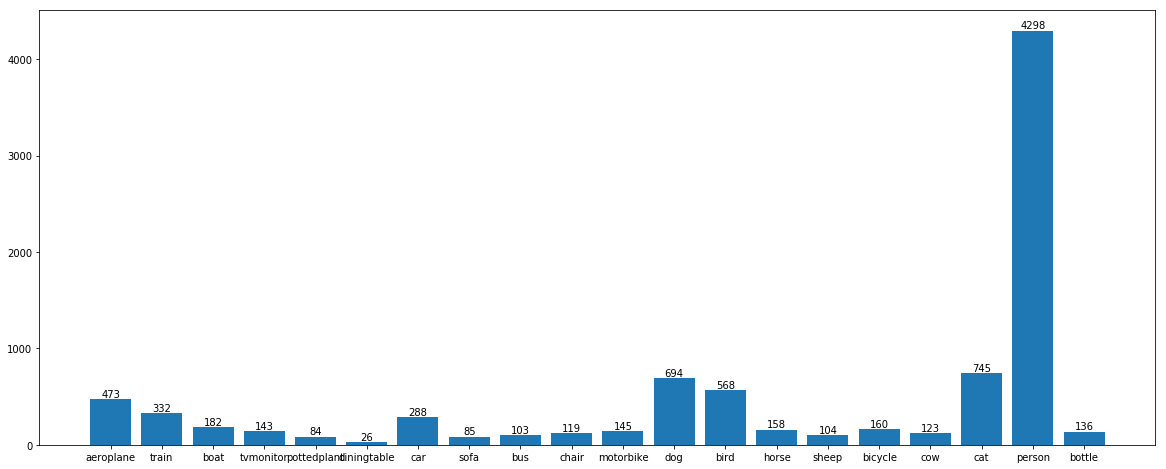

{'aeroplane': 473,
 'bicycle': 160,
 'bird': 568,
 'boat': 182,
 'bottle': 136,
 'bus': 103,
 'car': 288,
 'cat': 745,
 'chair': 119,
 'cow': 123,
 'diningtable': 26,
 'dog': 694,
 'horse': 158,
 'motorbike': 145,
 'person': 4298,
 'pottedplant': 84,
 'sheep': 104,
 'sofa': 85,
 'train': 332,
 'tvmonitor': 143}

In [21]:
get_class_distrib(class_dataset, True)

In [22]:
class_dataset.pop('diningtable')

['2010_004391',
 '2011_000598',
 '2007_009706',
 '2009_002024',
 '2010_003594',
 '2010_005576',
 '2009_003115',
 '2009_004399',
 '2010_002729',
 '2010_001181',
 '2009_004124',
 '2010_000938',
 '2007_003668',
 '2009_000846',
 '2010_000088',
 '2008_005953',
 '2008_005145',
 '2008_004216',
 '2008_004588',
 '2007_005803',
 '2011_000461',
 '2010_001777',
 '2010_003897',
 '2007_001834',
 '2011_001770',
 '2009_001867']

In [23]:
persons_list = class_dataset['person']

In [25]:
len(persons_list[:len(persons_list) // 3])

1432

In [26]:
class_dataset['person'] = persons_list[:len(persons_list) // 3]

In [28]:
with open('./classes_fnames_single_objects_only_very_important_2007.pkl', 'rb') as single_objects:
    class_dataset2 = pickle.load(single_objects)

In [32]:
for each_class, class_files in class_dataset.items():
    
    class_dataset[each_class] = class_files + class_dataset2[each_class]

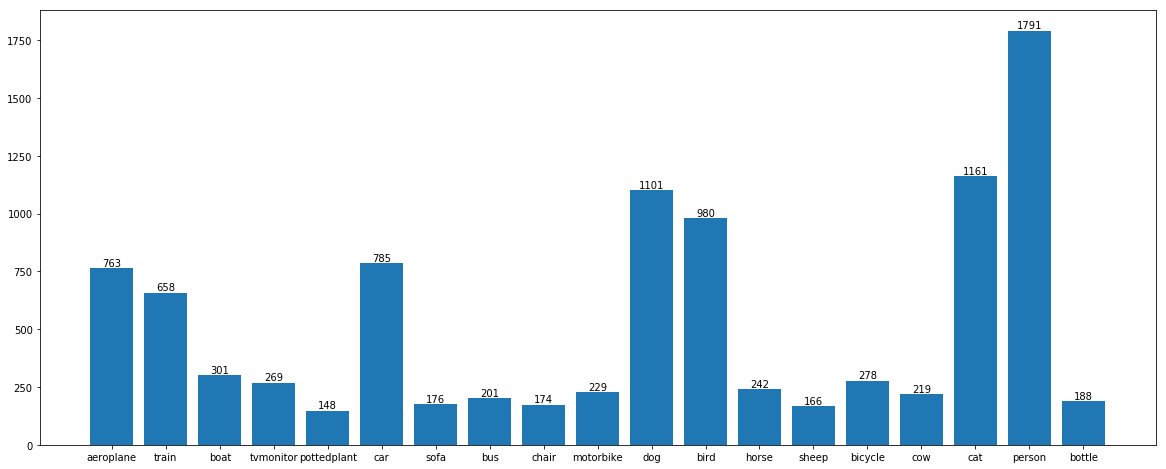

{'aeroplane': 763,
 'bicycle': 278,
 'bird': 980,
 'boat': 301,
 'bottle': 188,
 'bus': 201,
 'car': 785,
 'cat': 1161,
 'chair': 174,
 'cow': 219,
 'dog': 1101,
 'horse': 242,
 'motorbike': 229,
 'person': 1791,
 'pottedplant': 148,
 'sheep': 166,
 'sofa': 176,
 'train': 658,
 'tvmonitor': 269}

In [33]:
get_class_distrib(class_dataset, True)

In [34]:
with open('final_single_objects_merged_VOC.pkl', 'wb') as towrite:
    pickle.dump(class_dataset, towrite)